# <font color='#3d59c6'> # MD004 ENTREGA8 NAIVE BAYES & ANÁLISIS DE SENTIMIENTO </font>


## <font color='#3d59c6'> Información </font>



###### **Trabajo del Tema 8**

**Descripción de la tarea:**

El csv adjunto incluye reviews que han dejado usuarios en la Google Play Store en referencia a 23 apps, incluyendo una valoración categórica sobre el análisis de sentimiento. Los datos son los siguientes:

- package_name: Nombre de la app
- review: Texto del usuario con la review
- polarity: Sentimiento de polaridad de la review:
    - 1: Review con un sentimiento muy positivo o muy negativo
    - 0: Review con un sentimiento neutro (-->realizo una pequeña corrección, el enunciado ponía '2')

**Se pide:**

1. **Limpieza de instancias (3.5p)**: Limpieza de texto de las instancias. Se valorará el uso de las técnicas empleadas y las explicaciones en el notebook
2. **Creación de modelo clasificador de Naive Bayes (3.5p)**: Se valorará el uso de técnicas empleadas como el split entre entrenamiento y validación y selección de métrica de optimización
3. **Optimización del modelo (2p)**: En base a los resultados obtenidos, ¿Somos capaces de mejorar nuestro modelo? Se valorará el uso de ténicas como Laplace smoothing, uso de
la variable categórica package_name
4. **Conclusiones y vías abiertas (1p)**: ¿Qué resultados obtenemos en el modelo?, ¿Predice correctamente?, ¿En todas las apps?, ¿Qué datos podrían ayudarnos a mejorar la predicción?

**>> este ejercicio no tiene una solución única<<** Muchas opciones pueden ser válidas, pero se espera que se haga una interpretación de los datos obtenidos en todos los puntos y que se construya un modelo de Naive Bayes acorde a lo analizado (Si la clasificación es válida, por qué lo es y si no llega a serlo, por qué no lo es y cómo podrían mejorarse los resultados)


## <font color='#3d59c6'>  0. Carga de Packages </font>

In [1]:
install.packages("caret") #5min
 library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



In [2]:
install.packages('slam')
install.packages('tm')
install.packages('SnowballC')
install.packages('gmodels')
install.packages('wordcloud')
install.packages("e1071")
 library(e1071)

 library(tm)
 library(SnowballC)
 library(wordcloud)
 library(gmodels)
 library(wordcloud)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


Loading required package: RColorBrewer



## <font color='#3d59c6'>  1. Carga de Datos  </font>


In [3]:
data_subject = read.csv(file='/content/sentiment_dataset.csv', header=TRUE, sep=',', dec=',')
head(data_subject)#de forma predefinida retorna las primeras 6 observations
tail(data_subject)#de forma predefinida retorna las últimas 6 observations

,package_name,review,polarity
,<chr>,<chr>,<int>
1,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0
2,com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0
3,com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0
4,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0
5,com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0
6,com.facebook.katana,"idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it is no longer available. please fix. i have an htc desire. will rate 5 stars shown fixed đ",0


,package_name,review,polarity
,<chr>,<chr>,<int>
886,com.rovio.angrybirds,too many ads far more adverts than any other game i've played. i know it's free and they need the ads to make a profit but there needs to be a balance.,1
887,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it is incredible awesome and it's in go power and make a new clash of clans the same thing butt better,1
888,com.rovio.angrybirds,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1
889,com.rovio.angrybirds,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",0
890,com.rovio.angrybirds,"fun works perfectly well. ads aren't as annoying as you think, especially for a free game.",1
891,com.rovio.angrybirds,they're everywhere i see angry birds everywhere because i can't stop playing this game. get out my head devs! 4 đ because nothing's perfect,1


### <font color='#3d59c6'>  1.1 Exploración </font>

In [4]:
str(data_subject)

'data.frame':	891 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity    : int  0 0 0 0 0 0 0 0 0 0 ...


In [5]:
# Proporción de clases
round(prop.table(table(data_subject$polarity))*100, digits = 1)


   0    1 
65.5 34.5 

El balanceo del sentimiento se encuentra ligeramente desbalanceado. 65% de los sentimientos son neutros y el resto son sentimientos extremos

In [6]:
# Establecemos el tipo de dato a factor
data_subject$polarity = factor(data_subject$polarity)
data_subject$polarity

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
[112] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1
[149] 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1
[186] 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
[260] 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0
[445] 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1
[482] 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0
[519] 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0
[556] 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1
[593] 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1
[630] 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1
[667] 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
[704] 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
[741] 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0
[778] 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1
[815] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[852] 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1
[889] 0 1 1
Levels: 0 1

### <font color='#3d59c6'>  1.2 Transformación y limpieza de instancias  </font>


Procedemos a crear un mapa de palabras para analizar que palabras se repiten más.

Se aplica la función VectorSource() para tratar cada fila como si fuese un documento.
VCorpus() alamcenana la colección de "datos" (documentos).

**VENTAJAS**

- A nivel computacional los datos se guardan en la memoria, por lo que computacionalmente es más eficiente
- El tipo de almacenamiento corpus tiene funciones que nos permiten manipular textos de una forma eficiente con funciones predefinidas

In [162]:
replacePunctuation = function(x) {
  # Reemplaza la puntuación por un espacio en blanco
  gsub('[[:punct:]]', ' ', x)
}

removeAccents = function(x) {
  # Remueve los acentos
  chartr('àáèéìíòóùú', 'aaeeiioouu', x)
}

removeSpecialWords = function(x) {
  # Elimina palabras que no contienen caracteres alfabéticos
  words <- unlist(strsplit(as.character(x), " "))
  words <- words[!grepl("[^[:alpha:]]", words)]
  paste(words, collapse = " ")
}

clean_corpus = function(corpus){
  data_corpus_clean = tm_map(corpus, content_transformer(tolower))
  data_corpus_clean = tm_map(data_corpus_clean, removeNumbers)
  data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords('english'))
  data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords())
  data_corpus_clean = tm_map(data_corpus_clean, removePunctuation)
  data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)
  data_corpus_clean = tm_map(data_corpus_clean, removeAccents)
  data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)
  data_corpus_clean = tm_map(data_corpus_clean, removeWords, c('the', 'if','is','are'))
  data_corpus_clean = tm_map(data_corpus_clean, stemDocument, 'english')
  data_corpus_clean = tm_map(data_corpus_clean, removeSpecialWords)
  data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)

  data_corpus_clean
}


Luego de examinar la matríz observamos que hay palabras que no contienen caracteres alphabeticos, se crea una función para eliminar esas palabras

In [163]:
data_corpus = VCorpus(VectorSource(data_subject$review),readerControl = list(language = 'en'))
data_corpus_clean = clean_corpus(data_corpus)
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] "privaci least put option appear offlin mean peopl like big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still can see onlin"



La transformación del texto se lleva a cabo utilizando la función tm_map(), que permite quitar signos de puntuación, eliminar acentos, espacios, y realizar otras operaciones de limpieza y preprocesamiento del texto.

En principio, se ve que todos los comentarios no tienen mayúsculas, sin embargo, utilizamos esta transformación para asegurarnos de que no haya mayúsculas.

No suele haber en inglés estos caracteres con acentos, se hace para asegurar que no haya por cualquier motivo.

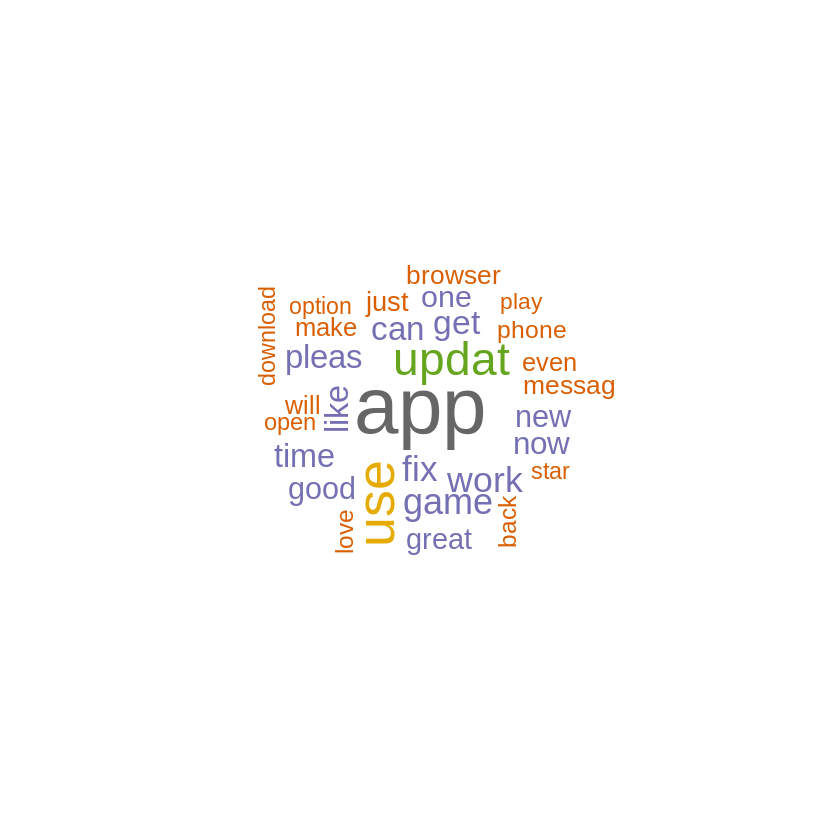

In [164]:
wordcloud(data_corpus_clean, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

Se observan palabras positivas como great, good love; negativas como fix y neutrales como even.

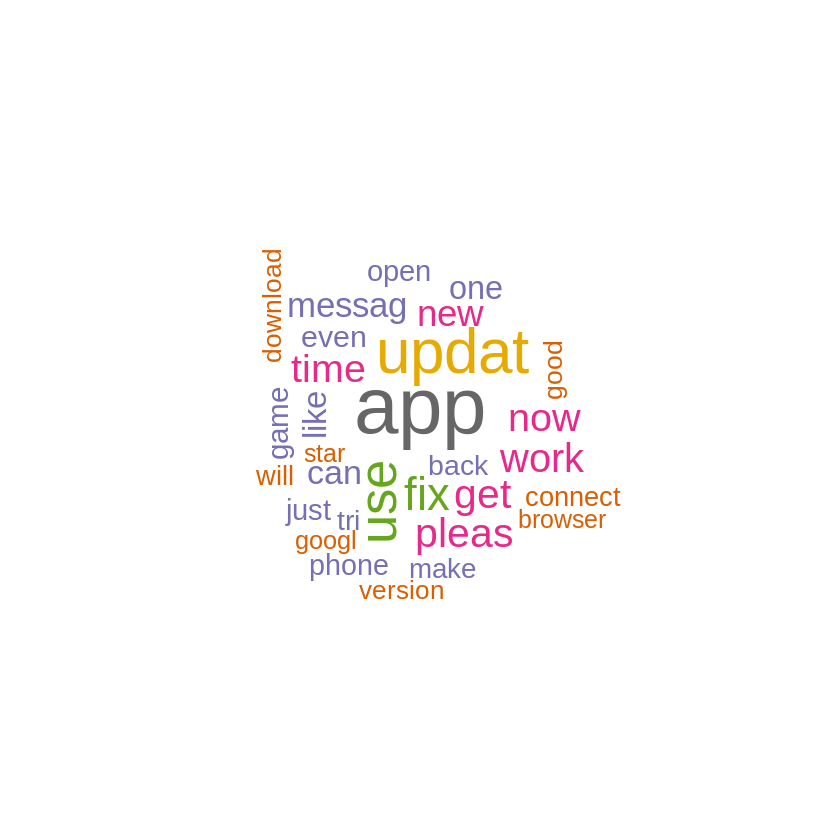

In [165]:
data_subject_neutral = subset(data_subject, data_subject$polarity =='0')
data_corpus_neutral = VCorpus(VectorSource(data_subject_neutral$review),readerControl = list(language = 'en'))
data_corpus_clean_neutral = clean_corpus(data_corpus_neutral)

wordcloud(data_corpus_clean_neutral, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

En la nube de palabras neutral, se dejan de ver palabras asociadas a sentimientos. aunque aun se observa "good", "like"

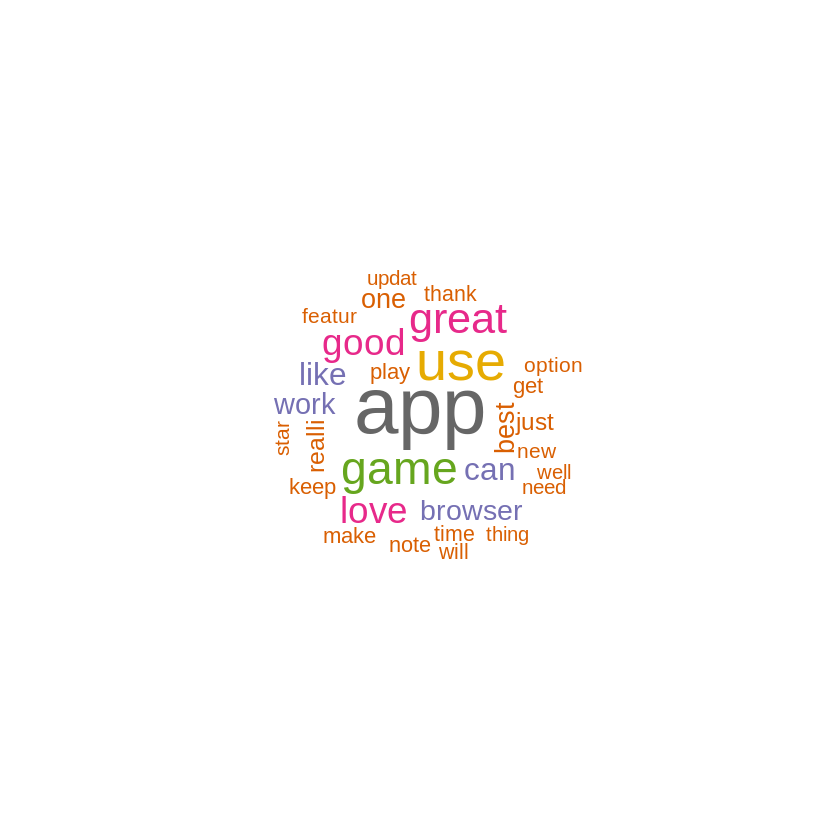

In [166]:
data_subject_extreme = subset(data_subject, data_subject$polarity =='1')
data_corpus_extreme = VCorpus(VectorSource(data_subject_extreme$review),readerControl = list(language = 'en'))
data_corpus_clean_extreme = clean_corpus(data_corpus_extreme)

wordcloud(data_corpus_clean_extreme, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

En la nube de palabras extremos, se evidencian las palabras asociadas a sentimientos como great, best, love, best

### <font color='#3d59c6'>  1.3 Separación Train y Test </font>

Ahora se procede a descomponer cada mensaje en palabras individuales para crear la base del análisis. Esto se logra creando una matriz que tiene:

*   Las columnas, que incluyen todas las palabras presentes en el corpus.
*   Las filas, que representan cada mensaje según está definido en el conjunto de datos original.
*   Los valores, que indican la frecuencia con la que cada palabra aparece en cada mensaje.


Es importante destacar que la mayoría de las entradas de esta matriz serán 0, ya que muchas palabras no estarán presentes en algunos mensajes. Utilizaremos la función DocumentTermMatrix para generar esta matriz de manera eficiente.

In [183]:
dtm = DocumentTermMatrix(data_corpus_clean)
dtm

<<DocumentTermMatrix (documents: 891, terms: 2625)>>
Non-/sparse entries: 16614/2322261
Sparsity           : 99%
Maximal term length: 24
Weighting          : term frequency (tf)

In [184]:
str(dtm)

List of 6
 $ i       : int [1:16614] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:16614] 121 239 335 342 383 712 761 806 1215 1274 ...
 $ v       : num [1:16614] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 891
 $ ncol    : int 2625
 $ dimnames:List of 2
  ..$ Docs : chr [1:891] "character(0)" "character(0)" "character(0)" "character(0)" ...
  ..$ Terms: chr [1:2625] "aafnaii" "aakhirat" "aalikati" "aap" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [185]:
as.matrix(dtm)

,aafnaii,aakhirat,aalikati,aap,aapsssssss,aaru,abil,abk,abl,absolut,⋯,yep,yes,yet,youtub,yrs,yup,zenfon,zero,zespol,zoom
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Observamos que hay muchas palabras que no tienen sentido, con muchos caracteres especiales. Sin embargo, estas palabras estan lejos de las más frecuentes

In [186]:
#Establecemos las frecuencias de cada término sumando las columnas
termFreq = colSums(as.matrix(dtm))
head(termFreq)

aafnaii   aakhirat   aalikati        aap aapsssssss       aaru 
         1          1          1          4          1          1

In [187]:
#Creamos el nuevo data set
tabla_frec = data.frame(term = names(termFreq), freq = termFreq)
head(tabla_frec)

,term,freq
,<chr>,<dbl>
aafnaii,aafnaii,1
aakhirat,aakhirat,1
aalikati,aalikati,1
aap,aap,4
aapsssssss,aapsssssss,1
aaru,aaru,1


In [188]:
#Ordenamos por frecuencias descendientes
tabla_frec = tabla_frec[order(-tabla_frec[,2]),]
head(tabla_frec)

,term,freq
,<chr>,<dbl>
app,app,481
use,use,301
updat,updat,248
game,game,179
work,work,176
fix,fix,172


In [189]:
set.seed(555)

# Creamos el data partition de la función caret con un 70 - 30 split
inTrain <- createDataPartition(y = data_subject$polarity
                                  , p = .80
                                  , list = FALSE
                                  , times = 1)
# Definitmos los datasets originales entre train y test
data.train<-data_subject[inTrain,]
data.test<-data_subject[-inTrain,]
# Revisamos el split
str(data.train)
str(data.test)

'data.frame':	714 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	177 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " forced reload on uploading pic on replying comment last n

Se crea una particion de la polaridad del 70%

In [190]:
# Separamos el corpus según la clase
corpus.train = data_corpus_clean[inTrain]
corpus.test  = data_corpus_clean[-inTrain]

# Y finalmente el Document term matrix
dtm.train = dtm[inTrain, ]
dtm.test  = dtm[-inTrain, ]

# Comprobamos que el desbalanceo de clases es el adecuado
print("Training")
round(prop.table(table(data.train$polarity))*100, 2)
print("Test")
round(prop.table(table(data.test$polarity))*100, 2)

[1] "Training"



    0     1 
65.55 34.45 

[1] "Test"



    0     1 
65.54 34.46 

Observamos que la distribución de separación es la misma para Test y Train. Asi que se aplica la filtración por frecuencia

In [191]:
#Encontramos todas las palabras que se repiten más de 3 veces
freq_terms = findFreqTerms(dtm.train, 5)
freq_terms

[1] "abil"       "abl"        "absolut"    "access"     "account"   
  [6] "action"     "actual"     "add"        "addict"     "ago"       
 [11] "album"      "allow"      "almost"     "along"      "alreadi"   
 [16] "also"       "alway"      "amaz"       "android"    "angri"     
 [21] "annoy"      "anoth"      "answer"     "anymor"     "anyon"     
 [26] "anyth"      "app"        "appear"     "appli"      "applic"    
 [31] "around"     "asap"       "ask"        "attack"     "auto"      
 [36] "automat"    "avail"      "away"       "awesom"     "back"      
 [41] "background" "backup"     "bad"        "bar"        "base"      
 [46] "basic"      "batteri"    "becom"      "begin"      "best"      
 [51] "better"     "big"        "bird"       "bit"        "black"     
 [56] "block"      "book"       "bookmark"   "booster"    "bottom"    
 [61] "box"        "break"      "brilliant"  "brows"      "browser"   
 [66] "bug"        "build"      "busi"       "button"     "buy"       
 [71] "cach"       "call"       "can"        "candi"      "cant"      
 [76] "cap"        "capit"      "card"       "care"       "caus"      
 [81] "certain"    "challeng"   "chang"      "chat"       "check"     
 [86] "choic"      "choos"      "chrome"     "classic"    "clear"     
 [91] "click"      "close"      "clutter"    "coc"        "code"      
 [96] "color"      "colour"     "come"       "comment"    "compani"   
[101] "compar"     "compat"     "complain"   "complet"    "comput"    
[106] "connect"    "consid"     "constant"   "contact"    "continu"   
[111] "control"    "convers"    "cool"       "coupl"      "crap"      
[116] "crash"      "crazi"      "creat"      "crush"      "current"   
[121] "custom"     "daili"      "data"       "day"        "dead"      
[126] "dear"       "decreas"    "default"    "definit"    "delet"     
[131] "design"     "desktop"    "dev"        "develop"    "devic"     
[136] "differ"     "difficult"  "direct"     "disappear"  "disappoint"
[141] "doesnt"     "done"       "dont"       "doubt"      "download"  
[146] "drive"      "drop"       "dropbox"    "due"        "easi"      
[151] "easili"     "edit"       "either"     "els"        "email"     
[156] "emoji"      "enabl"      "end"        "engin"      "english"   
[161] "enjoy"      "enough"     "enter"      "entir"      "episod"    
[166] "error"      "especi"     "essenti"    "etc"        "even"      
[171] "ever"       "everi"      "evernot"    "everyon"    "everyth"   
[176] "everytim"   "excel"      "except"     "exit"       "expect"    
[181] "experi"     "extrem"     "facebook"   "fact"       "fail"      
[186] "famili"     "fantast"    "far"        "fast"       "faster"    
[191] "favorit"    "featur"     "feed"       "feel"       "file"      
[196] "final"      "find"       "fine"       "firefox"    "first"     
[201] "five"       "fix"        "folder"     "follow"     "font"      
[206] "forc"       "format"     "forward"    "found"      "free"      
[211] "freez"      "frequent"   "friend"     "frozen"     "frustrat"  
[216] "full"       "fun"        "function"   "galaxi"     "game"      
[221] "gem"        "get"        "gif"        "give"       "given"     
[226] "glitch"     "goe"        "gold"       "gone"       "gonna"     
[231] "good"       "googl"      "got"        "great"      "group"     
[236] "guy"        "half"       "hall"       "hamro"      "hand"      
[241] "hang"       "hangout"    "happen"     "happi"      "hard"      
[246] "hate"       "head"       "hear"       "help"       "hey"       
[251] "high"       "histori"    "home"       "honest"     "hope"      
[256] "horribl"    "hour"       "howev"      "htc"        "icon"      
[261] "idea"       "imag"       "implement"  "import"     "imposs"    
[266] "improv"     "includ"     "inform"     "initi"      "instal"    
[271] "instead"    "interest"   "interfac"   "intern"     "internet"  
[276] "introduc"   "iphon"      "issu"       "item"       "job"       
[281] "just"       "keep" 

Se observan aún algunas palabras que tienen caracteres especiales.

In [192]:
#Recortamos el data set con las palabras con una frecuencia superior a 3
freq_terms = findFreqTerms(dtm.train, 3)
reduced_dtm.train = DocumentTermMatrix(corpus.train, list(dictionary=freq_terms))
reduced_dtm.test =  DocumentTermMatrix(corpus.test, list(dictionary=freq_terms))

#Revisamos cuantas columnas reducimos
ncol(dtm.train)
ncol(reduced_dtm.train)
ncol(dtm.test)
ncol(reduced_dtm.test)

[1] 2625

[1] 923

[1] 2625

[1] 923

Se filtra por frecuencia de 3, para que el train y el test solo tengan estas palabras de mayor frecuencia.

## <font color='#3d59c6'>  2. Creación de modelo clasificador de Naive Bayes  </font>


Naive Bayes opera con variables categóricas, y la  DRT utiliza valores numéricos. Se crea una función diseñada para convertir números en variables categóricas y la se aplica a las matrices reducidas.

In [193]:
convert_counts = function(x) {
  x = ifelse(x > 0, 1, 0)
  x = factor(x, levels = c(0, 1), labels=c("No", "Yes"))
  return (x)
}

# apply() allows us to work either with rows or columns of a matrix.
# MARGIN = 1 is for rows, and 2 for columns
reduced_dtm.train = apply(reduced_dtm.train, MARGIN=2, convert_counts)
reduced_dtm.test  = apply(reduced_dtm.test, MARGIN=2, convert_counts)

In [194]:
# store our model in sms_classifier
subject_classifier = naiveBayes(reduced_dtm.train # Dataset de entrenamiento
                            , data.train$polarity) # Target de entrenamiento

subject_test.predicted = predict(subject_classifier,  # Predicciones utilizando el modelo creado con los datos de entrenamiento
                             reduced_dtm.test) # Generación de predicciones para el dataset de test

Aplicandolo para Train y Test

In [195]:
# Ahora sacamos el confusion matrix
confusionMatrix(subject_test.predicted, data.test$polarity)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 100  11
         1  16  50
                                         
               Accuracy : 0.8475         
                 95% CI : (0.7859, 0.897)
    No Information Rate : 0.6554         
    P-Value [Acc > NIR] : 8.086e-09      
                                         
                  Kappa : 0.6687         
                                         
 Mcnemar's Test P-Value : 0.4414         
                                         
            Sensitivity : 0.8621         
            Specificity : 0.8197         
         Pos Pred Value : 0.9009         
         Neg Pred Value : 0.7576         
             Prevalence : 0.6554         
         Detection Rate : 0.5650         
   Detection Prevalence : 0.6271         
      Balanced Accuracy : 0.8409         
                                         
       'Positive' Class : 0              
                                         

La matriz de confusión nos muestra que hay 21 instancias que fueron incorrectamente clasificadas como neutras cuando en realidad eran extremas.

Por otro lado, hay 28 instancias que fueron incorrectamente clasificadas como sentimientos extremos cuando en realidad eran neutros.

Se tiene un accuracy aceptable de 82%

la exactitud del modelo parece prometedora; sin embargo, es importante las características de las instancias en las que ocurren errores de predicción.

Posteriormente se cambio la frecuencia de las palabras y el % de train y test para ver si habia una mejora del modelo. Se disminuyeron los falsos positivos y negativos

In [196]:
# Visualizamos las instancias que han sido filtradas erróneamente
data.test[(subject_test.predicted != data.test$polarity) # Seleccionamos las instancias con error en la predicción
          & (data.test$polarity == '0'),] # Seleccionamos las instancias con etiqueta neutro

,package_name,review,polarity
,<chr>,<chr>,<fct>
36,com.facebook.katana,not good its previous version (12.0.0.15.14) is much good than that. i can't text directly with current version. please add the inbuilt messenger again in the app.,0
58,com.twitter.android,why is there so much space? there is so much white space and everything is so spaced out. also the notifications are always late.,0
127,com.king.candycrushsaga,it takes me two levels back and no boosters not happy with this game.i passed the hard level an i was two level forward to the hard level and i had boosters.after work i open the game no booster and i was two steps back .back to the hard level.after that the game switches its self off,0
160,com.imangi.templerun2,book and their use as a great christmas navarro was gonna get a lot of different names for christmas is a screamer and i can't remember if my sis and baking and making everything so perfect for me to believe in things and i'll return to go over in a few minutes ago and i have a great day at home soon and their little room in the kids to school with your questions,0
180,com.imangi.templerun2,temple run -pretty good the game is fun.but i would like it if it didn't have so many videos for one specific app most of the time. it would also be nice if you could choose to be a boy or a girl character. overall the game is okay/pretty good,0
417,com.facebook.orca,not good i had for a while but is not working keeps messing up my face book must have a big because i deleted and my face book works,0
553,com.dropbox.android,"it used up my battery!!!!!! i forgot to switch back to my home screen and keep opening dropbox app, then my battery dropped from 50% to 25% in 30mins. it really is a 'drop'box.",0
563,jabanaki.todo.todoly,has potential could be better but it conts to crash after some use. love the web version though!,0
566,jabanaki.todo.todoly,dud on droid4 doesn't work on my new droid4,0


Luego de visualizar los de sentimiento extremo, clasificados como neutro, observamos los de sentimiento neutro, clasificados como extremo

In [197]:
# Visualizamos las instancias que han sido filtradas erróneamente
data.test[(subject_test.predicted != data.test$polarity) # Seleccionamos las instancias con error en la predicción
          & (data.test$polarity == '1'),] # Seleccionamos las instancias con etiqueta extremo

,package_name,review,polarity
,<chr>,<chr>,<fct>
74,com.twitter.android,love it you are able to see celebrity tweets and get info you didn't know... i love it,1
189,com.imangi.templerun2,"everyone able to see highest score i would like to given one idea ,i could not saw everyone higher score atleast 1 to 5 member, i want to see each and everyone highest score through on my mobile , if you create this option, everyone will be try to achive the highest score ,i hope you will be create this option of temple run 2",1
343,com.viber.voip,i love viber viber is an excellent chatting software. only one tiny negative comment for you. sometimes it takes a delay to reach message even online. stickers are so cool...,1
358,com.google.android.talk,won't make calls i have 5 bars on verizon 4g but it keeps saying can not connect call. so far had only connected 1 call when i had 1 bar and the other person couldn't hear me. i have tried at over 20 different locations in the city i live in all around 4 or 5 bars. no calls can be made. fix this.,1
441,com.whatsapp,occasionally i won't receive a notification of a message(s) so i don't know that someone has replied until i actually open the app and then suddenly lots of messages come through... 5 stars if that can be fixed,1
529,com.dropbox.android,just one irritating issue very nice app... except one issue. there is no option of select all for photos inside a folder. i have to select each photo individually. and there is no option to download or make offline the entire folder. one of the above options must be there.,1
613,com.evernote,"really cool and organized. the new update is really amazing, the widgets are cool, however, it would be helpful if you could add right to left reading and writing support (like hebrew, 'cause when i want to add check box the text removed to the left). also, you need to add an option to change the size of the preview (don't like it's so small), and app animations would be nice. something else to your attention: i want to by the app, but it really (really) expensive. if it was cheaper and one time charge i would buy it.",1
644,com.uc.browser.en,pics are not loaded i love using uc browser but the only erorr i m facing that when i login fb pic are not loaded... plz fix dis issue,1
737,com.opera.mini.native,"the best mobile browser ever opera mini is still the best mobile browser in terms of data saving. however, the browser doesn't support gif animation/image, it doesn't support themes, night mode is not impressive, saved pages should be accessed locally and transferable to other opera mini device/browser. above all it's a good browser with beautiful ui; it's my number one choice browser. thumbs up guys!",1


## <font color='#3d59c6'>  3. Optimización del modelo  </font>


### <font color='#3d59c6'> Laplace Smoothing </font>

El modelo de clasificación de texto se enfrenta a palabras no entrenadas, lo que puede causar problemas donde la probabilidad 0. Para evitar esto, se aplica Laplace smoothing. Esta técnica agrega un factor de suavizado a todas las frecuencias de palabras durante el entrenamiento del modelo, incluso a aquellas no vistas previamente. De esta manera, todas las palabras tienen una probabilidad no nula, lo que evita bloqueos del modelo o resultados incorrectos. Es importante elegir cuidadosamente el valor del factor de suavizado para equilibrar el sesgo y la capacidad de manejar nuevas palabras. Laplace smoothing debería mejorar la generalización y robustez del modelo.






In [198]:
# Hacemos una iteración para nuestro modelo en base a un factor i, siendo i el factor alpha en el laplace smoothing
for (i in (1:10))
{
    print(paste0("Laplace factor of ", as.character((i-1)/4)))
    sms_classifier2 = naiveBayes(reduced_dtm.train,
                                 data.train$polarity,
                                 laplace = (i-1)/4)

    sms_test.predicted2 = predict(sms_classifier2,
                                  reduced_dtm.test)

    print(confusionMatrix(sms_test.predicted2, data.test$polarity))
}

[1] "Laplace factor of 0"
Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 100  11
         1  16  50
                                         
               Accuracy : 0.8475         
                 95% CI : (0.7859, 0.897)
    No Information Rate : 0.6554         
    P-Value [Acc > NIR] : 8.086e-09      
                                         
                  Kappa : 0.6687         
                                         
 Mcnemar's Test P-Value : 0.4414         
                                         
            Sensitivity : 0.8621         
            Specificity : 0.8197         
         Pos Pred Value : 0.9009         
         Neg Pred Value : 0.7576         
             Prevalence : 0.6554         
         Detection Rate : 0.5650         
   Detection Prevalence : 0.6271         
      Balanced Accuracy : 0.8409         
                                         
       'Positive' Class : 0              
                        

Una vez utilizado Laplace, se observa que disminuye los falsos positivos mientras los falsos negativos disminuyen.

## <font color='#3d59c6'>  4. Conclusiones y vías abiertas  </font>


El balanceo del sentimiento se encuentra ligeramente desbalanceado. 65% de los sentimientos son neutros y el resto son sentimientos extremos.

La transformación del texto se lleva a cabo utilizando la función tm_map(), que permite quitar signos de puntuación, eliminar acentos, espacios, y realizar otras operaciones de limpieza y preprocesamiento del texto.

En principio, se ve que todos los comentarios no tienen mayúsculas, sin embargo, utilizamos esta transformación para asegurarnos de que no haya mayúsculas.

Luego de examinar la matriz observamos que hay palabras que no contienen caracteres alphabeticos, se crea una función para eliminar esas palabras

En la nube de palabras neutral, se dejan de ver palabras asociadas a sentimientos. aunque aun se observa "good", "like".

En la nube de palabras extremos, se evidencian las palabras asociadas a sentimientos como great, best, love, best.

Se crea una partición de la polaridad del 70%

Observamos que la distribución de separación es la misma para Test y Train. Así que se aplica la filtración por frecuencia

Se filtra por frecuencia de 3, para que el train y el test solo tengan estas palabras de mayor frecuencia.

Naive Bayes opera con variables categóricas, y la  DRT utiliza valores numéricos. Se crea una función diseñada para convertir números en variables categóricas y la se aplica a las matrices reducidas.

La matriz de confusión nos muestra que hay 21 instancias que fueron incorrectamente clasificadas como neutras cuando en realidad eran extremas.

Por otro lado, hay 28 instancias que fueron incorrectamente clasificadas como positivas cuando en realidad eran neutras.

Se tiene un accuracy aceptable de 82%

El modelo de clasificación de texto se enfrenta a palabras no entrenadas, lo que puede causar problemas donde la probabilidad 0. Para evitar esto, se aplica Laplace smoothing. Esta técnica agrega un factor de suavizado a todas las frecuencias de palabras durante el entrenamiento del modelo, incluso a aquellas no vistas previamente. De esta manera, todas las palabras tienen una probabilidad no nula, lo que evita bloqueos del modelo o resultados incorrectos. Es importante elegir cuidadosamente el valor del factor de suavizado para equilibrar el sesgo y la capacidad de manejar nuevas palabras. Laplace smoothing debería mejorar la generalización y robustez del modelo.

Una vez utilizado Laplace, se observa que disminuye los falsos positivos mientras los falsos negativos disminuyen.

Sería un buen método de optimización si se buscara minimizar las revisiones clasificadas incorrectamente como muy positivas o muy negativas (1) por el modelo, cuando en realidad son neutras (0).

Otra forma que se buscó para mejorar el modelo fue incrementar el filtro de frecuencia de para realizar el entrenamiento. Pasó de 3 a 5. Y se aumentó el porcentaje de Train - test que subió a 80%. Esto disminuyo los falsos positivos y negativos.

Una forma de aumentar la precisión de clasificación del modelo puede ser incrementando el filtrado de palabras y ver que numero puede llegar a ser más óptimo.

